In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import numpy as np
from sklearn.preprocessing import normalize
from scipy.optimize import curve_fit
from scipy import stats
from scipy.interpolate import interp1d

Text(0.5, 0, 'Wavelength (nm)')

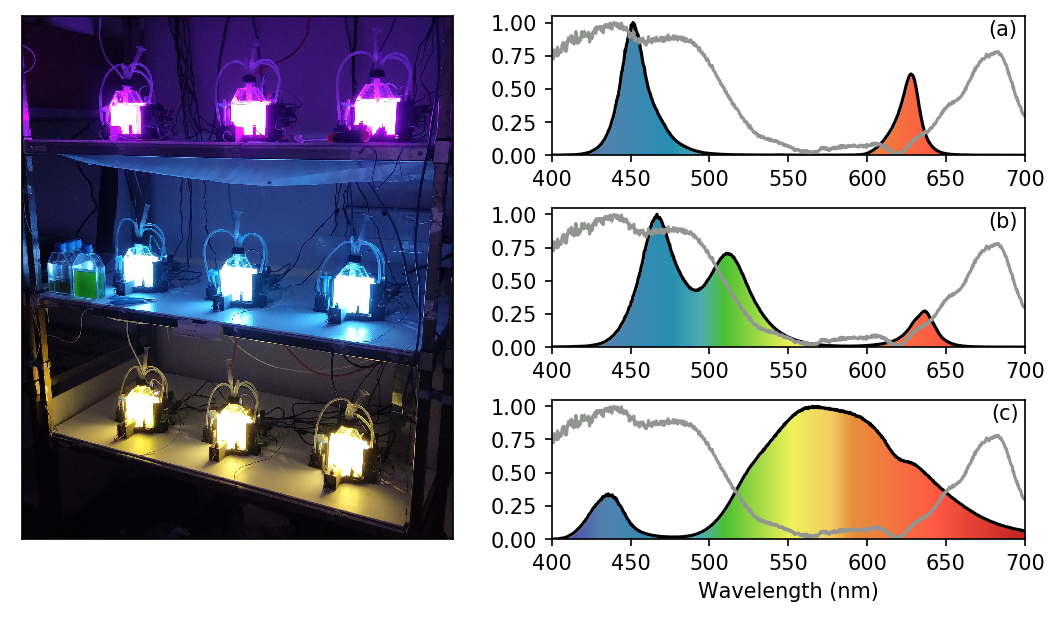

In [2]:
experimental_setup_im = mpimg.imread("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Cropped_Setup.jpg")
light_spectra = mpimg.imread("C:\\Users\\Owner\OneDrive - UTS\\Chapter 4\\Figures\\Light_Spectra.png")

led_spectra_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Phenobottle_Spectra.csv")
abs_spectra_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Preliminary Data\\Absorbance Spectra (UTS-LD and CS-41).csv")

fig = plt.figure(constrained_layout=True, figsize=(7, 4), dpi=150)
gs = GridSpec(3, 2, figure=fig)
background_color = 'w'

ax1 = fig.add_subplot(gs[:, 0])
ax1.imshow(experimental_setup_im)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(light_spectra, extent=(400, 700, 0, 1.05), aspect='auto')
ax2.plot(led_spectra_df["Wavelength"], normalize_data(led_spectra_df["RB"]), color="k")
ax2.plot(abs_spectra_df["Wavelength (nm)"], abs_spectra_df["UTS-LD Norm"], color="xkcd:grey")
ax2.set_yticks(np.arange(0, 1.1, 0.25))
ax2.set_ylim(0, 1.05)
ax2.set_xlim(400, 700)
ax2.fill_between(led_spectra_df["Wavelength"], normalize_data(led_spectra_df["RB"]), y2=1.05, color=background_color)
ax2.text(677, 0.9, "(a)")

ax3 = fig.add_subplot(gs[1, 1])
ax3.imshow(light_spectra, extent=(400, 700, 0, 1.05), aspect='auto')
ax3.plot(led_spectra_df["Wavelength"], normalize_data(led_spectra_df["RGB"]), color="k")
ax3.plot(abs_spectra_df["Wavelength (nm)"], abs_spectra_df["UTS-LD Norm"], color="xkcd:grey")
ax3.set_yticks(np.arange(0, 1.1, 0.25))
ax3.set_ylim(0, 1.05)
ax3.set_xlim(400, 700)
ax3.fill_between(led_spectra_df["Wavelength"], normalize_data(led_spectra_df["RGB"]), y2=1.05, color=background_color)
ax3.text(677, 0.9, "(b)")

ax4 = fig.add_subplot(gs[2, 1])
ax4.imshow(light_spectra, extent=(400, 700, 0, 1.05), aspect='auto')
ax4.plot(led_spectra_df["Wavelength"], normalize_data(led_spectra_df["White"]), color="k")
ax4.plot(abs_spectra_df["Wavelength (nm)"], abs_spectra_df["UTS-LD Norm"], color="xkcd:grey")
ax4.set_yticks(np.arange(0, 1.1, 0.25))
ax4.set_ylim(0, 1.05)
ax4.set_xlim(400, 700)
ax4.fill_between(led_spectra_df["Wavelength"], normalize_data(led_spectra_df["White"]), y2=1.05, color=background_color)
ax4.text(679, 0.9, "(c)")
ax4.set_xlabel("Wavelength (nm)")

# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Preliminary Figures\\Figure1.png", dpi=300)

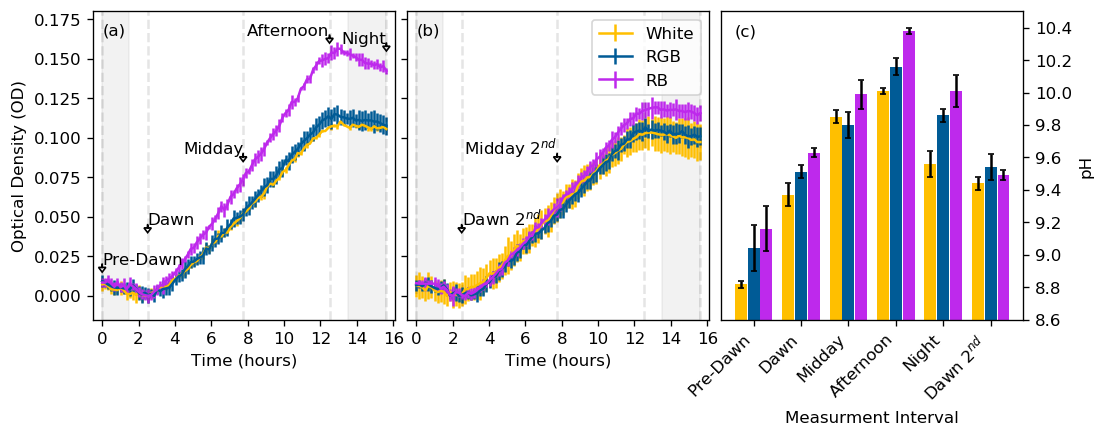

In [13]:
#pH Data
ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56, 9.44]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86, 9.54]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01, 9.49]
ph_whiteStdev = [0.02, 0.07, 0.04, 0.02, 0.08, 0.04]
ph_rgbStdev = [0.14, 0.04, 0.08, 0.05, 0.04, 0.08]
ph_rbStdev = [0.14, 0.03, 0.09, 0.02, 0.10, 0.03]

opt_den_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Optical_Density_Both_Trials.csv")

def normalize_data_min(data):
    return (data - np.min(data))

fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.4), dpi=120)
treatment_c = ["#ffbf00", "#005b96", "#be29ec"]
labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]

ax.errorbar(opt_den_df["Time"], normalize_data_min(opt_den_df["WhiteAv"]), yerr=opt_den_df["WhiteStDev"], color=treatment_c[0])
ax.errorbar(opt_den_df["Time"], normalize_data_min(opt_den_df["RGBAv"]), yerr=opt_den_df["RGBStDev"], color=treatment_c[1])
ax.errorbar(opt_den_df["Time"], normalize_data_min(opt_den_df["RBAv"]), yerr=opt_den_df["RBStDev"], color=treatment_c[2])
ax.set_ylim(-0.015, 0.18)
ax.get_shared_y_axes().join(ax, ax1)
ax.set_ylabel("Optical Density (OD)")
ax.set_xticks(np.arange(0, 18, 2))
ax.set_xlabel("Time (hours)")
ax.set_xlim(-0.5, 16.1)

x_vals = [0, 2.5, 7.75, 12.5, 15.624]
y_pos = [0.02, 0.045, 0.090, 0.165, 0.16]
for i in range(len(labels)):
    ax.axvline(x=x_vals[i], ymin=0, ymax=1, color='k', alpha=0.1, linestyle="--")
    ax1.axvline(x=x_vals[i], ymin=0, ymax=1, color='k', alpha=0.1, linestyle="--")

for i in range(len(labels)):
    if i == 0 or i == 1:
        ax.text(x=x_vals[i], y=y_pos[i], s=labels[i], horizontalalignment="left", rotation=0)
        ax.arrow(x=x_vals[i], y=y_pos[i], dx=0, dy=-0.005, head_width=0.4, head_length=0.003, length_includes_head=True, 
                facecolor="w")
    else:
        ax.text(x=x_vals[i], y=y_pos[i], s=labels[i], horizontalalignment="right", rotation=0)
        ax.arrow(x=x_vals[i], y=y_pos[i], dx=0, dy=-0.005, head_width=0.4, head_length=0.003, length_includes_head=True, 
                facecolor="w")

ax1.errorbar(opt_den_df["Time"], normalize_data_min(opt_den_df["WhiteAv2"]), yerr=opt_den_df["WhiteStDev2"], color=treatment_c[0], label="White")
ax1.errorbar(opt_den_df["Time"], normalize_data_min(opt_den_df["RGBAv2"]), yerr=opt_den_df["RGBStDev"], color=treatment_c[1], label="RGB")
ax1.errorbar(opt_den_df["Time"], normalize_data_min(opt_den_df["RBAv2"]), yerr=opt_den_df["RBStDev2"], color=treatment_c[2], label="RB")
ax1.set_ylim(-0.015, 0.18)
ax1.set_yticklabels([])
ax1.set_xticks(np.arange(0, 18, 2))
ax1.text(x=x_vals[1], y=y_pos[1], s="Dawn $2^{nd}$", horizontalalignment="left", rotation=0)
ax1.arrow(x=x_vals[1], y=y_pos[1], dx=0, dy=-0.005, head_width=0.4, head_length=0.003, length_includes_head=True, 
        facecolor="w")
ax1.text(x=x_vals[2], y=y_pos[2], s="Midday $2^{nd}$", horizontalalignment="right", rotation=0)
ax1.arrow(x=x_vals[2], y=y_pos[2], dx=0, dy=-0.005, head_width=0.4, head_length=0.003, length_includes_head=True, 
        facecolor="w")
ax1.set_xlabel("Time (hours)")
ax1.set_xlim(-0.5, 16.1)
ax1.legend(loc="upper right")

width = 0.25

labels2 = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night", "Dawn $2^{nd}$"]

x = np.arange(len(labels2))
rects1 = ax2.bar(x - width -0.02, ph_whiteAv, width, yerr=ph_whiteStdev, color=treatment_c[0], label="White", capsize=2)
rects2 = ax2.bar(x, ph_rgbAv, width, yerr=ph_rgbStdev, color=treatment_c[1], label="RGB", capsize=2)
rects3 = ax2.bar(x + width +0.02, ph_rbAv, width, yerr=ph_rbStdev, color=treatment_c[2], label="RB", capsize=2)

ax2.set_ylim(8.6, 10.5)
ax2.set_yticks(np.arange(8.6, 10.5, 0.2))
ax2.set_ylabel("pH")
ax2.set_xlabel("Measurment Interval")
ax2.set_xticks(x)
ax2.set_xticklabels(labels2, rotation=45, ha="right")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax.text(0, 0.165, "(a)")
ax1.text(0, 0.165, "(b)")
ax2.text(-0.4, 10.35, "(c)")

ax.axvspan(0, 1.5, alpha=0.1, color="grey")
ax1.axvspan(0, 1.5, alpha=0.1, color="grey")

ax.axvspan(13.5, 15.624, alpha=0.1, color="grey")
ax1.axvspan(13.5, 15.624, alpha=0.1, color="grey")

fig.subplots_adjust(wspace=0.04, right=None)
plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Preliminary Figures\\Figure2.png", dpi=300, bbox_inches="tight")


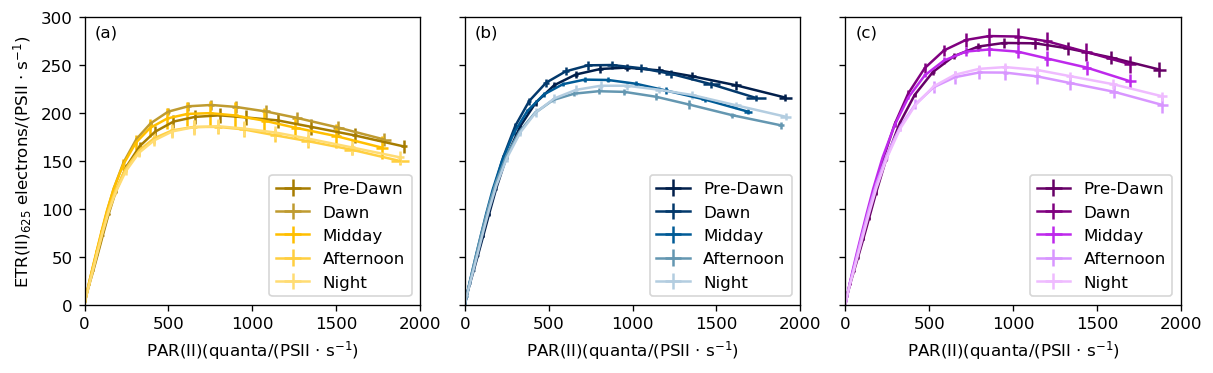

In [40]:
lc_df = pd.read_excel("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\LC_Combined.xlsx")
lc_df = lc_df.dropna()
lc_df.reset_index(drop=True, inplace=True)

lc_df2 = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\LC_Averages_Second.csv")
lc_df2 = lc_df2.dropna()
lc_df2.reset_index(drop=True, inplace=True)

blue_shade = ["#011f4b", "#03396c", "#005b96", "#6497b1", "#b3cde0"]
yellow_shade = ["#a67c00", "#bf9b30", "#ffbf00", "#ffcf40", "#ffdc73"]
purple_shade = ["#660066", "#800080", "#be29ec", "#d896ff", "#efbbff"]

fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), dpi=120, sharey=True, constrained_layout=True)

reps = [1, 2, 3, 4, 5]

time_name = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
for rep, blu, yell, purp, name in zip(reps, blue_shade, yellow_shade, purple_shade, time_name):
    ax.errorbar(lc_df[(lc_df["Light"] == "WHITE") & (lc_df["Rep"] == rep)]["PAR(II)"], 
            lc_df[(lc_df["Light"] == "WHITE") & (lc_df["Rep"] == rep)]["ETR(II)"],
                 xerr= lc_df[(lc_df["Light"] == "WHITE") & (lc_df["Rep"] == rep)]["PAR(II)StDev"], 
                 yerr=lc_df[(lc_df["Light"] == "WHITE") & (lc_df["Rep"] == rep)]["ETR(II)StDev"], color=yell, label=name)
    
    ax1.errorbar(lc_df[(lc_df["Light"] == "RGB") & (lc_df["Rep"] == rep)]["PAR(II)"], 
             lc_df[(lc_df["Light"] == "RGB") & (lc_df["Rep"] == rep)]["ETR(II)"],
                 xerr= lc_df[(lc_df["Light"] == "RGB") & (lc_df["Rep"] == rep)]["PAR(II)StDev"], 
                 yerr=lc_df[(lc_df["Light"] == "RGB") & (lc_df["Rep"] == rep)]["ETR(II)StDev"], color=blu, label=name)
    
    ax2.errorbar(lc_df[(lc_df["Light"] == "RB") & (lc_df["Rep"] == rep)]["PAR(II)"], 
                 lc_df[(lc_df["Light"] == "RB") & (lc_df["Rep"] == rep)]["ETR(II)"],
                 xerr= lc_df[(lc_df["Light"] == "RB") & (lc_df["Rep"] == rep)]["PAR(II)StDev"], 
                 yerr=lc_df[(lc_df["Light"] == "RB") & (lc_df["Rep"] == rep)]["ETR(II)StDev"], color=purp, label=name)

ax.legend(loc="lower right")
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax.set_xlim(0, 2000)
ax1.set_xlim(0, 2000)
ax2.set_xlim(0, 2000)
ax.set_ylim(0, 300)

ax.text(60, 280, s="(a)")
ax1.text(60, 280, s="(b)")
ax2.text(60, 280, s="(c)") 

x_label = "PAR(II)(quanta/(PSII $\cdot$ s$^{-1}$)"
ax.set_xlabel(x_label)
ax1.set_xlabel(x_label)
ax2.set_xlabel(x_label)
y_label = "ETR(II)$_{625}$ electrons/(PSII $\cdot$ s$^{-1}$)"
ax.set_ylabel(y_label)

# fig.subplots_adjust(wspace=0.1, right=None)

# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Preliminary Figures\\Figure3.png", dpi=300, bbox_inches="tight")

Text(0.1, 290, '(d)')

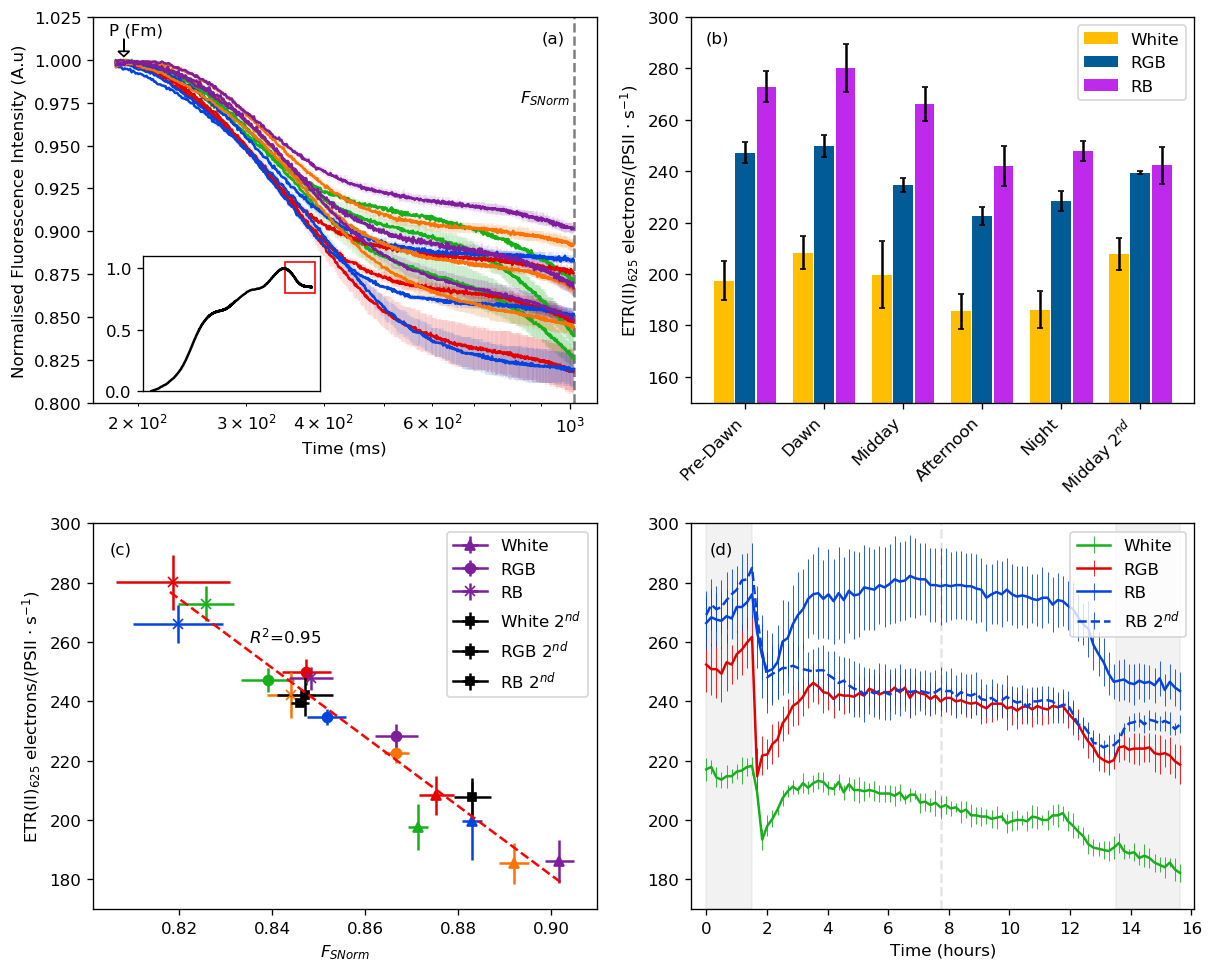

In [181]:
ojip_transient_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\OJIP_Last_Bit.csv")
lc_ojip_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Light_Curve_OJIP_Combined.csv")
est_etr_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Estimated_ETR.csv")
ojip_mini_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\OJIP Curves\PB7Curves.csv", 
                           names=["sql_time", "day_night", "time_ojip", "value_ojip", "norm_ojip"])

colors = ["xkcd:green", "xkcd:red", "xkcd:blue", "xkcd:orange", "xkcd:purple", "xkcd:black"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=120, constrained_layout=True)

# OJIP Transient
reps = [1, 2, 3, 4, 5]
time_name = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
for rep, color, name in zip(reps, colors, time_name):
    axes[0,0].errorbar(ojip_transient_df["Time"], ojip_transient_df["whiteAvR{}".format(rep)], 
                       yerr=ojip_transient_df["whiteStdevR{}".format(rep)], color=color, elinewidth=0.05)
    axes[0,0].errorbar(ojip_transient_df["Time"], ojip_transient_df["rgbAvR{}".format(rep)], 
                       yerr=ojip_transient_df["rgbStdevR{}".format(rep)], color=color, elinewidth=0.05)
    axes[0,0].errorbar(ojip_transient_df["Time"], ojip_transient_df["rbAvR{}".format(rep)], 
                       yerr=ojip_transient_df["rbStdevR{}".format(rep)], color=color, elinewidth=0.05)

axes[0,0].set_xscale("log")
axes[0,0].set_xlabel("Time (ms)")
axes[0,0].set_ylabel("Normalised Fluorescence Intensity (A.u)")
axes[0,0].set_ylim(0.8, 1.025)
axes[0,0].axvline(1015, color='k', alpha=0.5, linestyle="--")
axes[0,0].text(830, 0.975, "$F_{SNorm}$", rotation=0)
axes[0,0].text(180, 1.015, "P (Fm)")
axes[0,0].arrow(x=190, y=1.012, dx=0, dy=-0.01, head_width=8, head_length=0.003, length_includes_head=True, 
                facecolor="w")
plt.ticklabel_format(style="plain", axis='x')



axins = axes[0,0].inset_axes([0.1,0.03,0.35,0.35])
axins.plot([float(s) for s in ojip_mini_df["time_ojip"][10].split(",")][4:], [float(s) for s in ojip_mini_df["norm_ojip"][300].split(",")][4:], color='k')
axins.set_xscale("log")
axins.set_ylim(0, 1.1)
axins.get_xaxis().set_visible(False)
rect = plt.Rectangle(xy=(190, 0.8), width=1100, height=0.25, facecolor="w", edgecolor="r")
axins.add_patch(rect)


# Column Graph
labels2 = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night", "Midday $2^{nd}$"]
treatment_c = ["#ffbf00", "#005b96", "#be29ec"]
x = np.arange(len(labels2))
reps = [1, 2, 3, 4, 5, 6]
width = 0.25
for rep in reps:
    rects1 = axes[0,1].bar(rep - width - 0.02, lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["ETR(II)Max"], 
                           yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["ETR(II)MaxStdev"], 
                          width=width, color=treatment_c[0], capsize=2, label="White")
    rects2 = axes[0,1].bar(rep, lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["ETR(II)Max"], 
                           yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["ETR(II)MaxStdev"], 
                           width=width, color=treatment_c[1], capsize=2, label="RGB")
    rects3 = axes[0,1].bar(rep + width + 0.02, lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["ETR(II)Max"], 
                           yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["ETR(II)MaxStdev"],
                          width=width, color=treatment_c[2], capsize=2, label="RB")
axes[0,1].set_xticks(reps)
axes[0,1].set_xticklabels(labels2, rotation=45, ha="right")
axes[0,1].set_ylim(150, 300)
axes[0,1].set_ylabel("ETR(II)$_{625}$ electrons/(PSII $\cdot$ s$^{-1}$)")
axes[0,1].legend((rects1, rects2, rects3), ("White", "RGB", "RB"), loc="upper right")


# Linear Fit
def line_fit(x):
    new_y = []
    for i in range(len(x)):
        new_y.append(x[i]*-1164.68 + 1229.57)
    return new_y

treatment_c = ["#ffbf00", "#005b96", "#be29ec"]
reps = [1, 2, 3, 4, 5, 6]
for rep, color in zip(reps, colors):
    if rep != 6:
        point1 = axes[1,0].errorbar(x=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["OJIP1s"], 
                           y=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["ETR(II)Max"],
                          xerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["OJIP1sStdev"],
                          yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["ETR(II)MaxStdev"], 
                          color=color, marker="^")
        point2 = axes[1,0].errorbar(x=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["OJIP1s"], 
                           y=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["ETR(II)Max"],
                          xerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["OJIP1sStdev"],
                          yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["ETR(II)MaxStdev"], 
                          color=color, marker="o")
        point3 = axes[1,0].errorbar(x=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["OJIP1s"], 
                           y=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["ETR(II)Max"],
                          xerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["OJIP1sStdev"],
                          yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["ETR(II)MaxStdev"], 
                          color=color, marker="x")
    else:
        point4 = axes[1,0].errorbar(x=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["OJIP1s"], 
                           y=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["ETR(II)Max"],
                          xerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["OJIP1sStdev"],
                          yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "White")]["ETR(II)MaxStdev"], 
                                    marker="s", markeredgecolor=color, color=color, 
                                    ecolor=color, markersize=5)
        point5 = axes[1,0].errorbar(x=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["OJIP1s"], 
                           y=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["ETR(II)Max"],
                          xerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["OJIP1sStdev"],
                          yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RGB")]["ETR(II)MaxStdev"], 
                                    marker="s", markeredgecolor=color, color=color, 
                                    ecolor=color, markersize=5)
        point6 = axes[1,0].errorbar(x=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["OJIP1s"], 
                           y=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["ETR(II)Max"],
                          xerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["OJIP1sStdev"],
                          yerr=lc_ojip_df[(lc_ojip_df["Rep"] == rep) & (lc_ojip_df["Light"] == "RB")]["ETR(II)MaxStdev"], 
                                    marker="s", markeredgecolor=color, color=color, 
                                    ecolor=color, markersize=5)
    
axes[1,0].set_ylabel("ETR(II)$_{625}$ electrons/(PSII $\cdot$ s$^{-1}$)")
axes[1,0].set_xlabel("$F_{SNorm}$")
axes[1,0].set_ylim(170, 300)

axes[1,0].plot(np.arange(0.818, 0.902, 0.001), line_fit(np.arange(0.818, 0.902, 0.001)), "r--", zorder=10)
axes[1,0].text(0.835, 260, "$R^2$=0.95")
axes[1,0].legend((point1, point2, point3, point4, point5, point6), ("White", "RGB", "RB", "White $2^{nd}$", "RGB $2^{nd}$", "RB $2^{nd}$"))


# Estimated ETR
axes[1,1].errorbar(x=est_etr_df["Time"], y=est_etr_df["WhiteAv"], yerr=est_etr_df["WhiteStdev"], color=colors[0],
                  label="White", elinewidth=0.5)
axes[1,1].errorbar(x=est_etr_df["Time"], y=est_etr_df["RGBAv"], yerr=est_etr_df["RGBStdev"], color=colors[1], 
                  label="RGB", elinewidth=0.5)
axes[1,1].errorbar(x=est_etr_df["Time"], y=est_etr_df["RBAv"], yerr=est_etr_df["RBStdev"], color=colors[2], 
                  label="RB", elinewidth=0.5)
axes[1,1].errorbar(x=est_etr_df["Time"], y=est_etr_df["RBAv2"], yerr=est_etr_df["RBStdev2"], color=colors[2], 
                  linestyle="--", label="RB $2^{nd}$", elinewidth=0.5)

axes[1,1].set_xticks(np.arange(0, 18, 2))
axes[1,1].set_xlabel("Time (hours)")
axes[1,1].set_xlim(-0.5, 16.1)
axes[1,1].set_ylim(170, 300)
axes[1,1].axvspan(0, 1.5, alpha=0.1, color="grey")
axes[1,1].axvspan(13.5, 15.624, alpha=0.1, color="grey")
axes[1,1].legend(loc="upper right")

axes[1,1].axvline(x=7.75, ymin=0, ymax=1, color='k', alpha=0.1, linestyle="--")

axes[0,0].text(x=900, y=1.01, s="(a)")
axes[0,1].text(x=0.5, y=290, s="(b)")
axes[1,0].text(x=0.805, y=290, s="(c)")
axes[1,1].text(x=0.1, y=290, s="(d)")

# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Preliminary Figures\\Figure4.png", dpi=300, bbox_inches="tight")

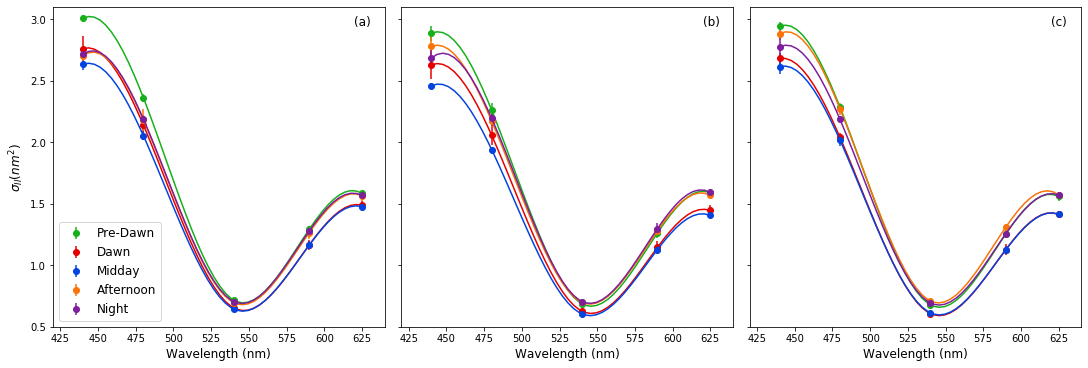

In [163]:
sigma_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Sigma_Averages.csv")

reps = [1, 2, 3, 4, 5]
colors = ["xkcd:green", "xkcd:red", "xkcd:blue", "xkcd:orange", "xkcd:purple"]
labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]

xnew = np.linspace(440, 625, num=50, endpoint=True)

fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True, sharey=True)
for rep, color, label in zip(reps, colors, labels):
    x = sigma_df[sigma_df["Rep"] == rep]["Wavelength"]
    y = sigma_df[sigma_df["Rep"] == rep]["WhiteAv"]
    xnew = np.linspace(440, 625, num=50, endpoint=True)
    f = interp1d(x.astype(float), y, kind='cubic')
    ax.errorbar(x, y, marker="o", color=color, yerr=sigma_df[sigma_df["Rep"] == rep]["WhiteStDev"], linestyle="none", label=label)
    ax.errorbar(xnew, f(xnew), color=color)

    x = sigma_df[sigma_df["Rep"] == rep]["Wavelength"]
    y = sigma_df[sigma_df["Rep"] == rep]["RGBAv"]
    f = interp1d(x.astype(float), y, kind='cubic')
    ax1.errorbar(x, y, marker="o", color=color, yerr=sigma_df[sigma_df["Rep"] == rep]["RGBStDev"], linestyle="none")
    ax1.errorbar(xnew, f(xnew), color=color)
    
    x = sigma_df[sigma_df["Rep"] == rep]["Wavelength"]
    y = sigma_df[sigma_df["Rep"] == rep]["RBAv"]
    f = interp1d(x.astype(float), y, kind='cubic')
    xnew = np.linspace(440, 625, num=50, endpoint=True)
    ax2.errorbar(x, y, marker="o", color=color, yerr=sigma_df[sigma_df["Rep"] == rep]["RBStDev"], linestyle="none")
    ax2.errorbar(xnew, f(xnew), color=color)
    ax.legend(loc="lower left", fontsize=12)
    
ax.set_xlabel("Wavelength (nm)", fontsize=12)
ax.set_ylabel("$\sigma_{II} (nm^{2})$", fontsize=12)
ax1.set_xlabel("Wavelength (nm)", fontsize=12)
ax2.set_xlabel("Wavelength (nm)", fontsize=12)
ax.set_ylim(0.5, 3.1)
ax.set_xlim(420, 640)
ax1.set_xlim(420, 640)
ax2.set_xlim(420, 640)

ax.text(620, 2.95, s="(a)", fontsize=12)
ax1.text(620, 2.95, s="(b)", fontsize=12)
ax2.text(620, 2.95, s="(c)", fontsize=12)

plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Preliminary Figures\\Figure3.png", dpi=300)